# PIMA INDIAN DIABETES DATASET

# Importing Libraries

In [352]:
'''IMPORTING REQUIRED LIBRARIES'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats#we used this library for testing distrubution
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

### Reading Dataset and arranging column names

In [222]:
'''Reading data set into df'''
df=pd.read_csv('pima-indians-diabetes.csv')

'''Chaning column names for ease sake'''
df.columns=['pregnant', 'glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age', 'target']

# Data Exploration

### checking the detailed view of the dataset ,for understanding any missing values, outliers,is dataset is small or big, distrubution of datasets (just overview)

In [223]:
df.info()
'''so from here we can understand there are no categorial values, and DPF,BMI are continuous, rest all are discrete values'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   tricep    768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   dpf       768 non-null    float64
 7   age       768 non-null    int64  
 8   target    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


'so from here we can understand there are no categorial values, and DPF,BMI are continuous, rest all are discrete values'

In [224]:
print(df.shape) #CHECKING SHAPE OF DATA
'''from this we can understand data set is small, since outcome is classification, and data set is small, this helps us to understand which type of model we can choose to get good accuracy for prediction'''

(768, 9)


'from this we can understand data set is small, since outcome is classification, and data set is small, this helps us to understand which type of model we can choose to get good accuracy for prediction'

In [225]:
print(df.describe()) #CHECKING ALL THE DESCPRITIVE DATA
'''From this we can understand that outliers and other details'''

         pregnant     glucose          bp      tricep     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              dpf         age      target  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

'From this we can understand that outliers and other details'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CCF804D08>,
      dtype=object)

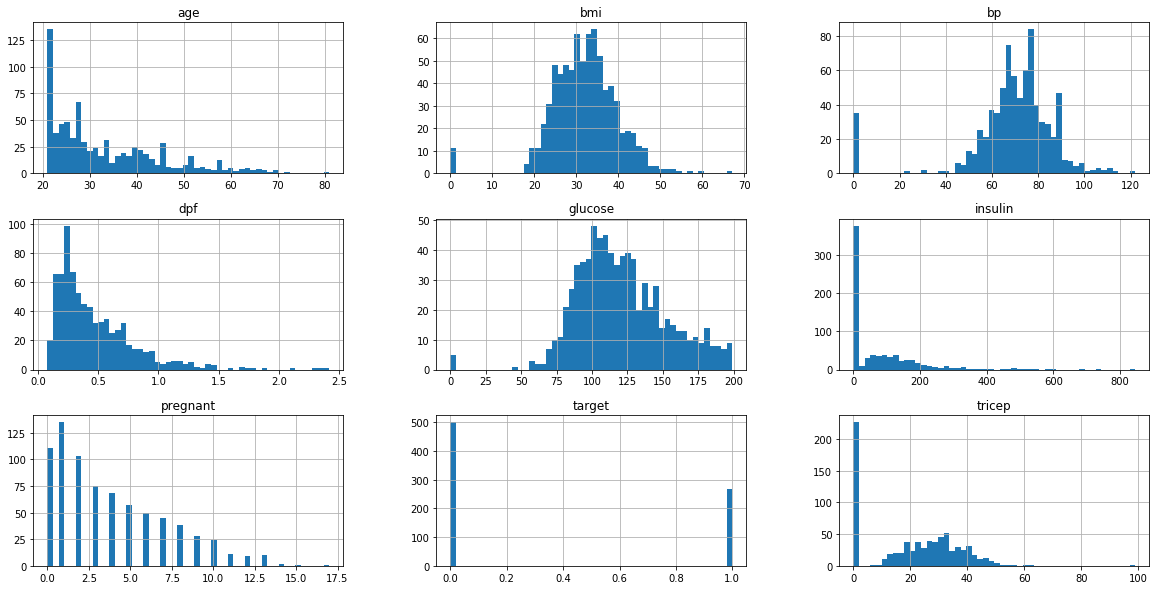

In [226]:
'''quickly checking the histogram , boxplot to deal know the distrubutions, and outliers '''
df.hist(figsize=(20,10),bins=50)


#### '''we can understand that age, dpf,insulin,pregnant are skewed(left)'''
#### '''here it raises the question why all skewed are showing high values at 0'''

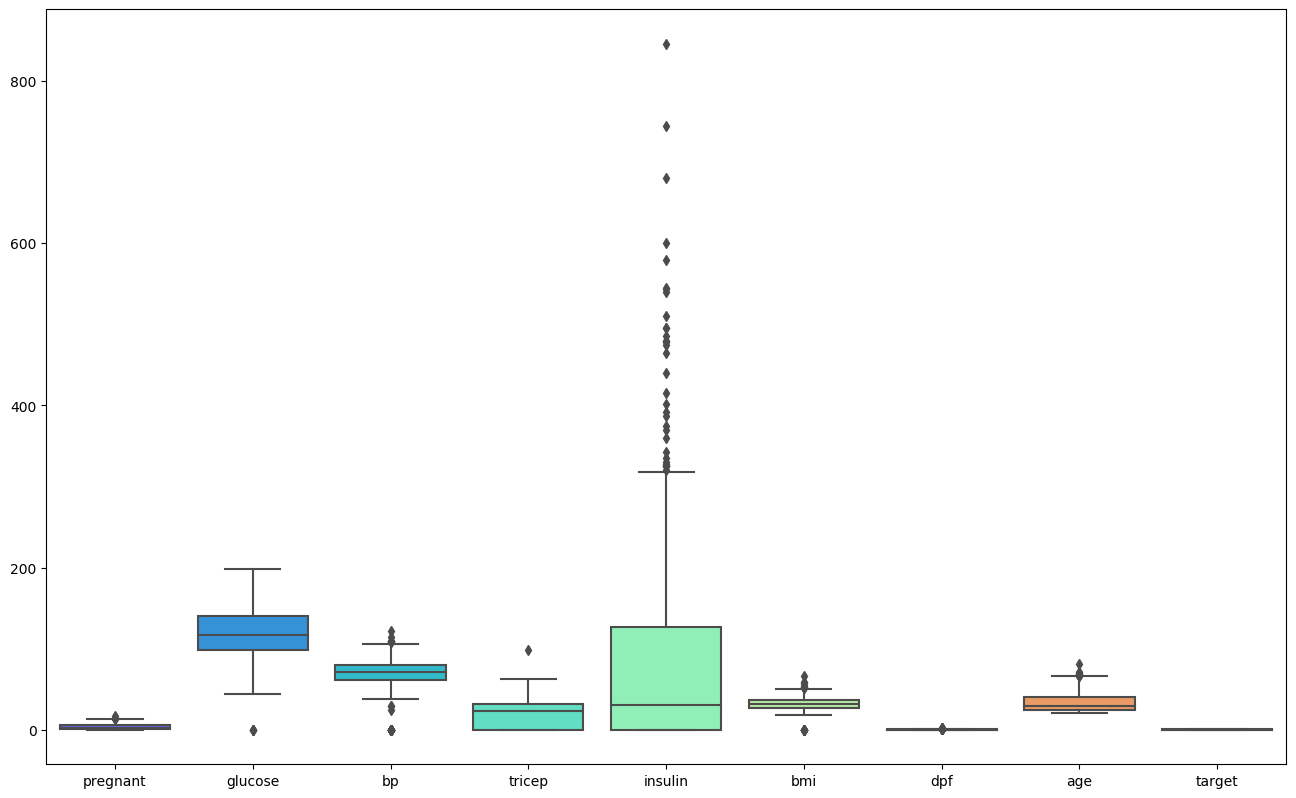

In [227]:
plt.figure(dpi=100,figsize=(16,10))
sns.boxplot(data=df,palette='rainbow')

#### '''from here we can understand that outilers are present '''
#### '''here also we can see that many columns touching the values zero'''

In [228]:
'''checking any missing values'''
print(df.isnull().sum())

pregnant    0
glucose     0
bp          0
tricep      0
insulin     0
bmi         0
dpf         0
age         0
target      0
dtype: int64


#### '''here we can see no null values, so no missing values'''

In [229]:
'''checking data , how it is '''
df.head()

,pregnant,glucose,bp,tricep,insulin,bmi,dpf,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#####  '''But we can see lot of 0 in insulin, BP,TRICEPS which may be wrong , because 0 months pregnant can be acceptable, but 0 insulin cannot beso this might be a missing values so , from here we can understand the need of missing values' , so quickly converting 0 to na, and then treat the missing values after checking the distrubution for real data we recieved without missing values'''

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CCF761C08>,
      dtype=object)

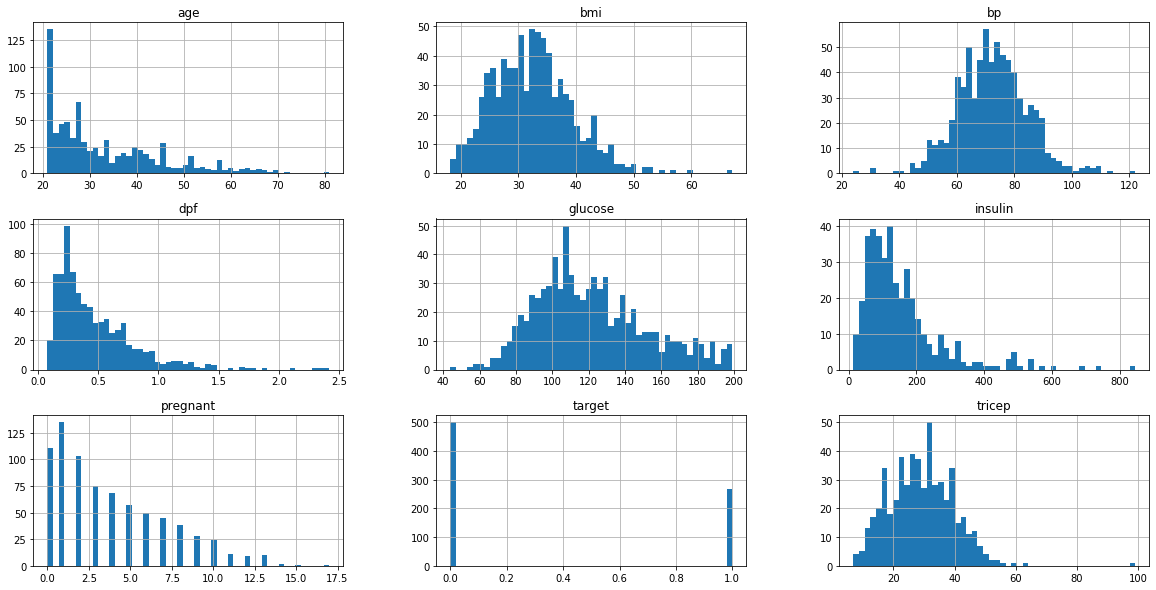

In [230]:
df.columns=['pregnant', 'glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age', 'target']


'''replacing the 0 values in bp,tricep,insulin,bmi,dfp,age'''
df[['glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age']]=df[['glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age']].replace([0],np.NaN)

'''before diving into handling missing values lets just check the characteristics of data'''
df.hist(figsize=(20,10),bins=50)

In [231]:
'''still we can see pregnant,insulin,age, dfp,tricep is affected by outliers, mostly and also skewed'''
'''we can first treat the missing values then treat the outliers'''
'''Even target seems like it is having imbalance data'''
df.isnull().sum()

pregnant      0
glucose       5
bp           35
tricep      227
insulin     374
bmi          11
dpf           0
age           0
target        0
dtype: int64

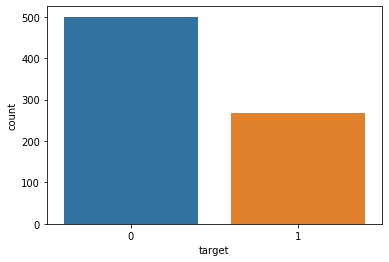

In [440]:
sns.countplot(df['target'])

###### '''Data seemed to be imbalance'''

###### '''we have good amount of data to train the model so that , it can understand the difference in target variable'''

# Preprocessing Data

### Handling Missing Values

In [234]:
df.loc[df.target==0].isnull().sum() #checking missing values for target =0

pregnant      0
glucose       3
bp           19
tricep      139
insulin     236
bmi           9
dpf           0
age           0
target        0
dtype: int64

In [235]:
df.loc[df.target==1].isnull().sum() #checking missing values for target =1

pregnant      0
glucose       2
bp           16
tricep       88
insulin     138
bmi           2
dpf           0
age           0
target        0
dtype: int64

In [245]:

'''replacing the NAN values in bp,tricep,insulin,bmi,dfp,age'''
df[['glucose', 'bp', 'tricep', 'insulin', 'bmi','dpf','age']]=df[['glucose', 'bp', 'tricep', 'insulin', 'bmi', 'dpf','age']].replace(np.NaN,0)

print('printing bp ')
print(df.loc[df.bp==0].shape)


'''printing tricep and insulin'''
print("printing tricep and not insulin ") 
print(df.loc[(df.tricep==0) & (df.insulin!=0)].shape)

'''printing bp, insulin'''
print("printing bp, not insulin ") 
print(df.loc[(df.bp==0) & (df.insulin!=0)].shape)

'''printing not bp,not tricep,insulin '''
print("printing not bp,not tricep and insulin ") 
print(df.loc[(df.bp!=0) &(df.tricep!=0) & (df.insulin==0)].shape)

'''printing glucose'''
print("printing glucose ") 
print(df.loc[df['glucose']==0].shape)

'''printing bmi'''
print("printing bmi ")
print(df.loc[df['bmi']==0].shape)


printing bp 
(35, 9)
printing tricep and not insulin 
(0, 9)
printing bp, not insulin 
(0, 9)
printing not bp,not tricep and insulin 
(145, 9)
printing glucose 
(0, 9)
printing bmi 
(0, 9)


###### '''since data is small, i am not thinking to just delete the rows, so there may be loss of data'''


###### '''we can also see that data missing is not completely random, it may be intentional as whoever missed the insulin, missed the values of bp, tricep so it may be missed not at random, so i am using techniques of mean, median, frequent occured'''

###### even though more classification algorithms dont make assumptions of distruibution, it is always good to be normal distrubution, as per central limit therom. so i am will be replace the missing value which will result in good shape,which approaches the original shape for ease and also compare the accuracy for model, so that this can give me which assumption best suits

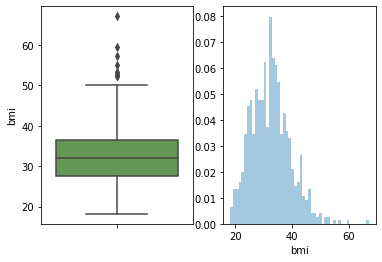

In [246]:
''' approach i will be following is , will impute with median mean, and  also random values, and for better approximation 
i will compute mean, median as per target variable because there is observable variance in insuiln, bp, skin levels with respect to target variable also'''
fig,[ax1,ax2]=plt.subplots(1,2)
ax1=plt.subplot(121)
sns.boxplot(df.bmi,palette='gist_earth',orient='vert',ax=ax1)
ax2=plt.subplot(122)
sns.distplot(df.bmi,bins=50,kde=False,norm_hist=True)

In [247]:

'''bmi can be imputed with resepect to mean or median'''
#bmi missing value change
df['bmi']=df['bmi'].replace([0],df['bmi'].mean())
print("printing bmi ")
print(df.loc[df['bmi']==0])

printing bmi 
Empty DataFrame
Columns: [pregnant, glucose, bp, tricep, insulin, bmi, dpf, age, target]
Index: []


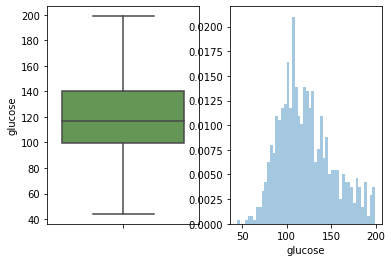

In [248]:
#replacing glucose with median, since even it contains outliers, so to not be effected by outliers.
fig,[ax1,ax2]=plt.subplots(1,2)
ax1=plt.subplot(121)
sns.boxplot(df.glucose,palette='gist_earth',orient='vert',ax=ax1)
ax2=plt.subplot(122)
sns.distplot(df.glucose,bins=50,kde=False,norm_hist=True)


In [249]:
#glucose missing value change
df['glucose']=df['glucose'].replace([0],df['glucose'].mean())


In [250]:
#just making easy to check the plots
def check_dist(x,y):
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(121)
    df[x].plot(kind='kde', ax=ax)
    df[y].plot(kind='kde', ax=ax, color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines,labels,loc='best')

###### '''now changing missing values of insulin, bp,tricep'''

In [251]:
'''replacing the 0 values in bp,tricep,insulin,bmi,dfp,age'''
df[['bp', 'tricep', 'insulin']]=df[['bp', 'tricep', 'insulin']].replace([0],np.NaN)

def impute_na(col):
    
    #equating column with mean and median values with respect to thier target
    #mean

    df[col+"_mean"]=df[col].copy()
    df.loc[(df['target'] == 0 ) & (df[col+"_mean"].isnull()), col+"_mean"]=df.loc[(df['target'] == 0 ) & (df[col+"_mean"].isnull()), col+"_mean"].fillna(df.groupby(df.target)[col].mean()[0])
    df.loc[(df['target'] == 1 ) & (df[col+"_mean"].isnull()), col+"_mean"]=df.loc[(df['target'] == 1 ) & (df[col+"_mean"].isnull()), col+"_mean"].fillna(df.groupby(df.target)[col].mean()[1])
#     df[col+"_mean"]=np.where(df.loc[(df['target'] == 0 ) & (df[col+"_mean"].isnull())]==np.Nan,df.groupby(df.target)[col].mean()[0],df[col+"_mean"])
#     df[col+"_mean"]=np.where(df.loc[(df['target'] == 0 ) & (df[col+"_mean"].isnull())]==np.Nan,df.groupby(df.target)[col].mean()[0],df[col+"_mean"])
    check_dist(col+"_mean",col)
    #median
    df[col+"_median"]=df[col].copy()
    df.loc[(df['target'] == 0 ) & (df[col+"_median"].isnull()), col+"_median"]=df.loc[(df['target'] == 0 ) & (df[col+"_median"].isnull()), col+"_median"].fillna(df.groupby(df.target)[col].median()[0])
    df.loc[(df['target'] == 1 ) & (df[col+"_median"].isnull()), col+"_median"]=df.loc[(df['target'] == 1 ) & (df[col+"_median"].isnull()), col+"_median"].fillna(df.groupby(df.target)[col].median()[1])
    check_dist(col+"_median",col)
    #fullmedian
    df[col+"_full_median"]=df[col].replace(np.NaN,df[col].median())
    check_dist(col+'_full_median',col)
    #fullmean
    df[col+"_full_mean"]=df[col].replace(np.NaN,df[col].mean())
    check_dist(col+'_full_mean',col)
    #random
    df[col+"_random"]=df[col].copy()
    ##It will have the random sample to fill the na
    random_sample=df[col].dropna().sample(df[col].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[col].isnull()].index
    df.loc[df[col].isnull(),col+'_random']=random_sample
    check_dist(col+'_random',col)

##### Imputations

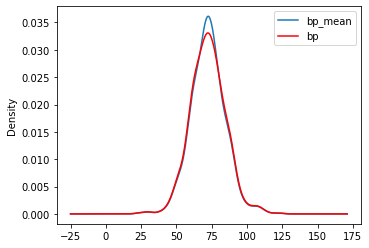

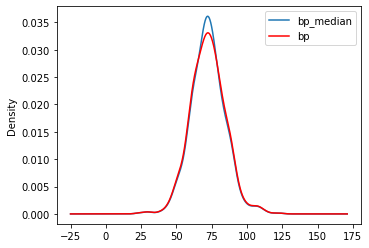

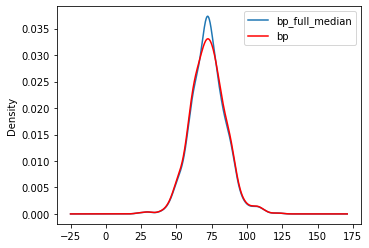

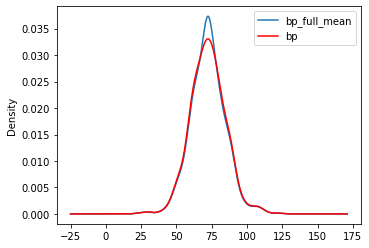

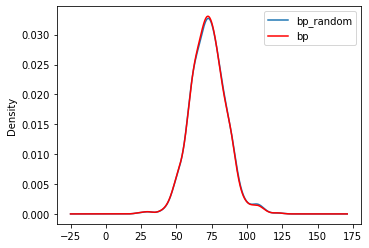

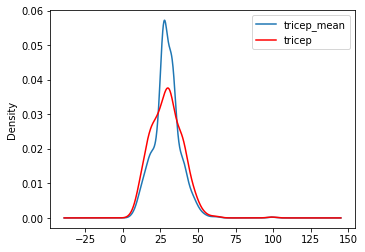

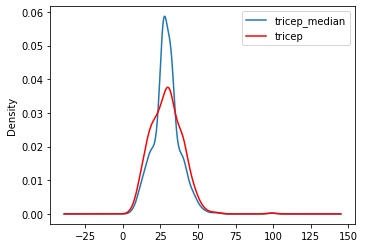

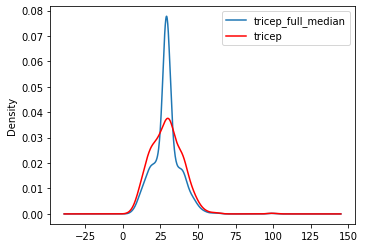

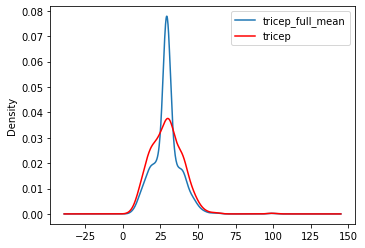

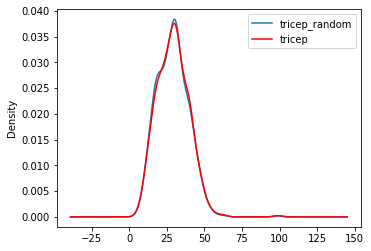

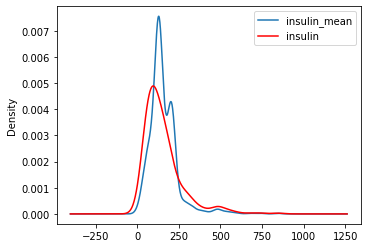

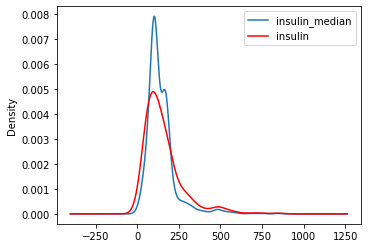

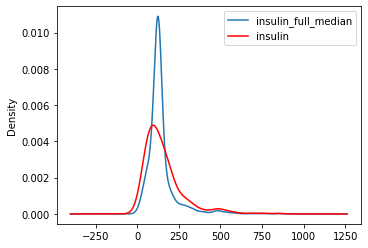

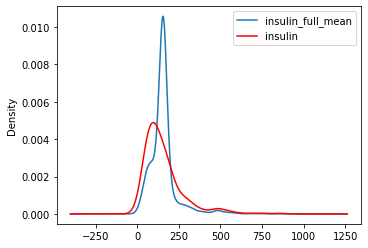

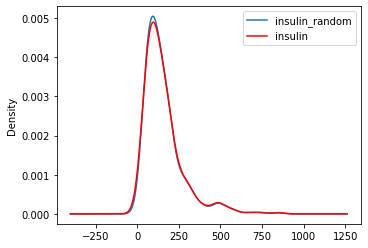

In [252]:
for i in ['bp','tricep','insulin']:
    impute_na(i)

###### '''from above observations we can change bp with bp_median,tricep with tricep_median,insulin with insulin_median we can also change with random values, but it may lead to overfitting so its good we can take median as approxiamtion'''


###### lets check the best suited approx by checking accuracy by any model,


In [253]:
# this methode will do  random forest classifier and return the accuracy score of the model
def best_imputed(df):
    features=df.drop(columns=['target'])
    output=df.target
    
    # define the cross validation procedure
    kfold = KFold(n_splits=5, shuffle=True, random_state=40)
    
    # define the model
    rf=RandomForestClassifier()
    
    # evaluate the model
    result = cross_val_score(rf, features, output, cv=kfold, scoring='accuracy')
    
    # report the mean performance
    return result.mean()

In [254]:
print('accuracy for mean:-->>'+best_imputed(df.loc[:,['pregnant', 'glucose','bmi', 'dpf', 'age','target', 'bp_mean','tricep_mean','insulin_mean']]).astype('str'))
print('accuracy for median:-->>'+best_imputed(df.loc[:,['pregnant', 'glucose','bmi', 'dpf', 'age','target', 'bp_median','tricep_median','insulin_median']]).astype('str'))


accuracy for mean:-->>0.8710720651897124
accuracy for median:-->>0.8789236906883966


###### '''It is clear that Median is best suit for our dataset from above analysis. and also we can see there are much outliers, which needed to be present in data, as they are actually crucial , so median is best choice ,since it is not effected to median'''

In [255]:
'''dropping unnecasscary columns'''
df.columns
df_before_Impute=df.copy()
df=df.loc[:,['pregnant','glucose','bp_median','tricep_median','insulin_median','bmi','dpf','age','target']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CC7292DC8>,
      dtype=object)

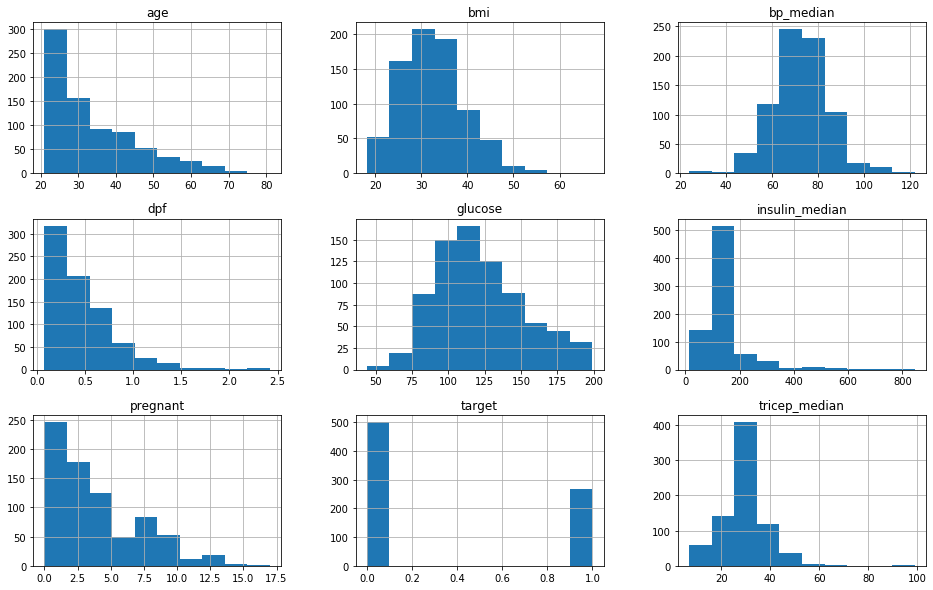

In [256]:
'''Now checking the histogram and box plot for better graphical understanding'''
df.hist(figsize=(16,10))

# Exploration Data Analysis

# Statistics

## '''Descriptive statistics '''

In [322]:
df.describe()

,pregnant,glucose,bp_median,tricep_median,insulin_median,bmi,dpf,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.389323,29.089844,141.753906,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.106039,8.890820,89.100847,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### '''For now we did some analysis like describe(), to know quantile,count etc, 
#### we can do descriptive analysis like univariate, multivariate, check for muliti collinearity also with thershold, to understand the data '''

#### Univariate Analysis-->


----------------------------------------------pregnant------------------------------------------------------


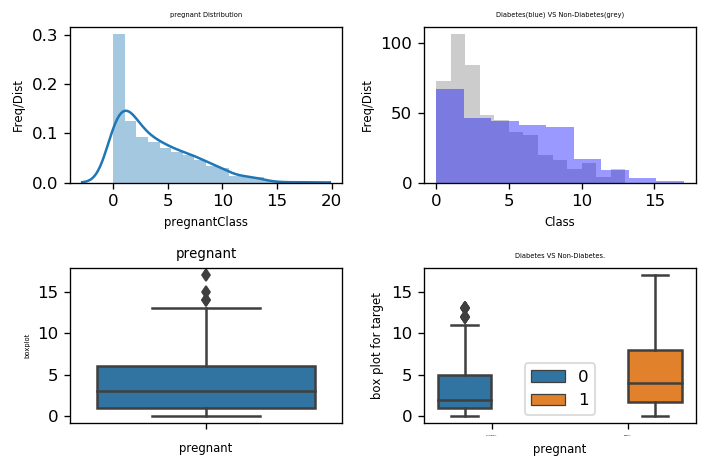

----------------------------------------------glucose------------------------------------------------------


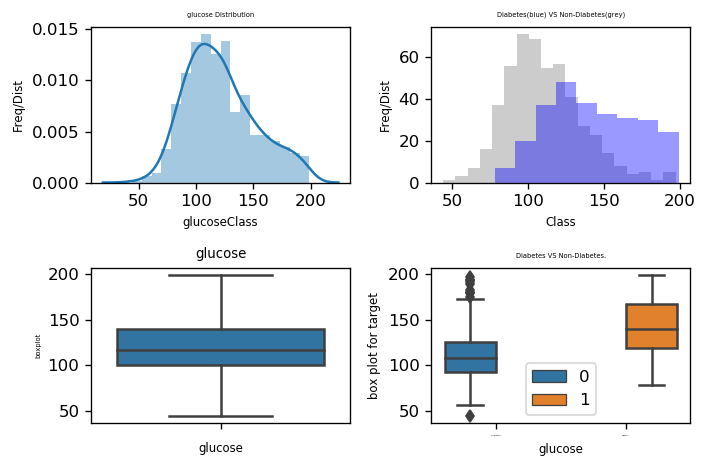

----------------------------------------------bp_median------------------------------------------------------


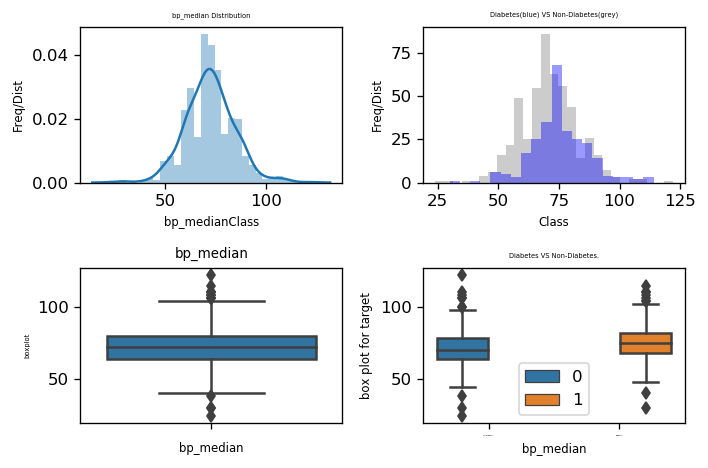

----------------------------------------------tricep_median------------------------------------------------------


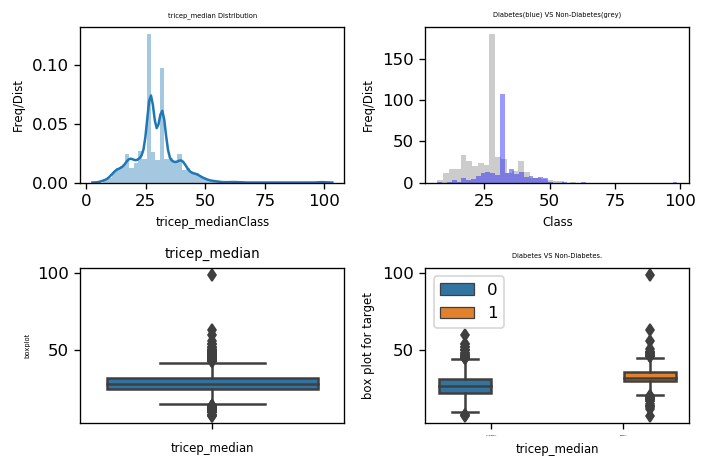

----------------------------------------------insulin_median------------------------------------------------------


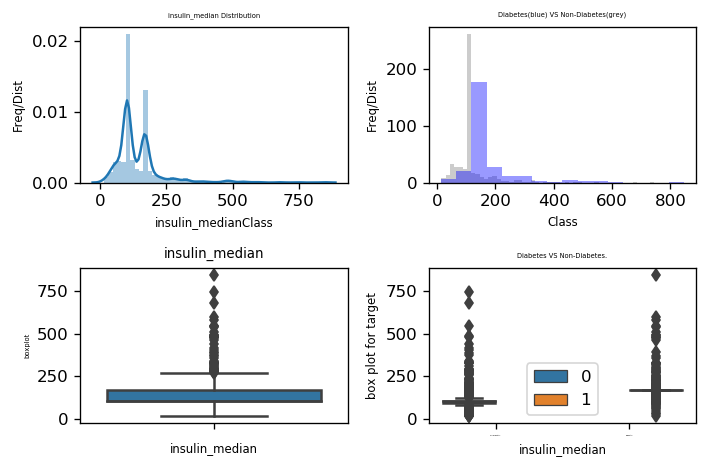

----------------------------------------------bmi------------------------------------------------------


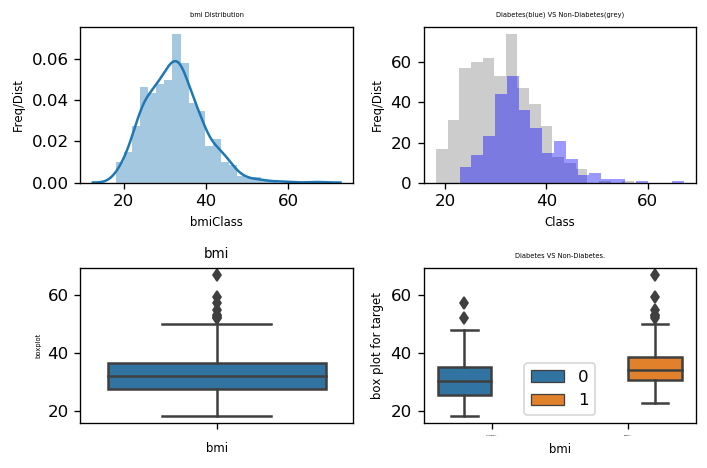

----------------------------------------------dpf------------------------------------------------------


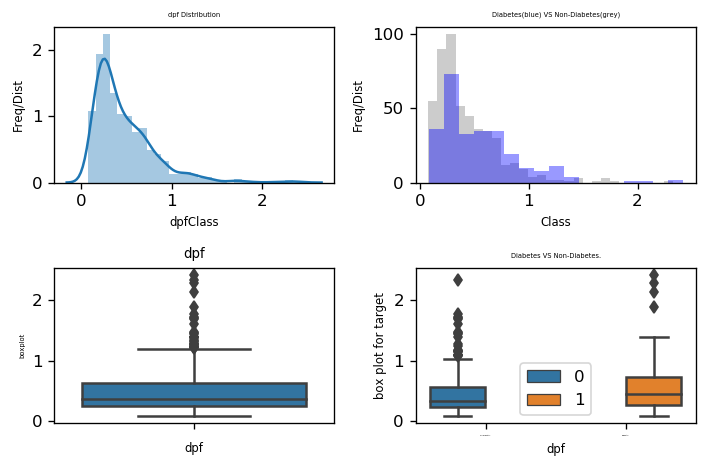

----------------------------------------------age------------------------------------------------------


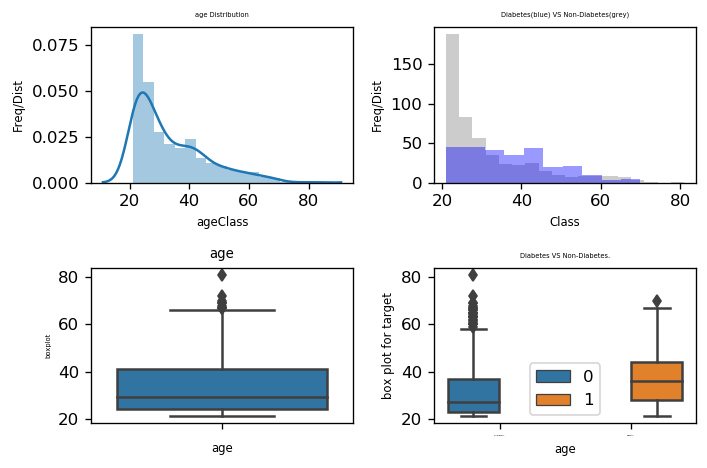

----------------------------------------------target------------------------------------------------------


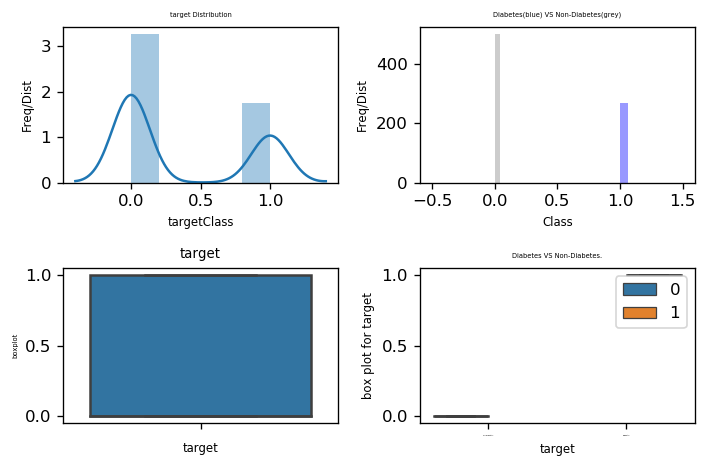

In [258]:
#for checking univariate analysis:
def univariate_analyis(col):
    print('----------------------------------------------'+col+'------------------------------------------------------')
    fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (6,4))
    sns.distplot(df[col],ax=axes[0][0])
    axes[0][0].set_title(col+' Distribution',fontdict={'fontsize':4})
    axes[0][0].set_xlabel(col+'Class',fontdict={'fontsize':7})
    axes[0][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
    plt.tight_layout()

    sns.distplot(df[df.target==0][col],kde=False,color="grey", label="Outcome=0", ax=axes[0][1])
    sns.distplot(df.loc[df.target==1][col],kde=False, color="blue", label="Outcome=1", ax=axes[0][1])
    axes[0][1].set_title('Diabetes(blue) VS Non-Diabetes(grey)',fontdict={'fontsize':4})
    axes[0][1].set_xlabel('Class',fontdict={'fontsize':7})
    axes[0][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
    lines, labels = axes[0][1].get_legend_handles_labels()
    plt.legend(lines,labels,loc='best')
    plt.tight_layout()

    sns.boxplot(df[col],ax=axes[1][0],orient='v')
    axes[1][0].set_title(col,fontdict={'fontsize':8})
    axes[1][0].set_xlabel(col,fontdict={'fontsize':7})
    axes[1][0].set_ylabel('boxplot',fontdict={'fontsize':4})
    plt.tight_layout()

    sns.boxplot(x='target',y=col,data=df,ax=axes[1][1],hue=df.target)
    axes[1][1].set_title('Diabetes VS Non-Diabetes.',fontdict={'fontsize':4})
    axes[1][1].set_xlabel(col,fontdict={'fontsize':7})
    axes[1][1].set_ylabel('box plot for target',fontdict={'fontsize':7})
    plt.xticks(ticks=[0,1],labels=['Non-Diabetes','Diabetes'],fontsize=1)
    lines, labels = axes[1][1].get_legend_handles_labels()
    plt.legend(lines,labels,loc='best')
    plt.tight_layout()
    plt.show()
    

for i in df.columns:
    univariate_analyis(i)

Text(0.5, 1.0, 'What age people have more diabetic')

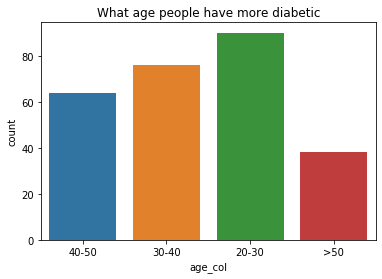

In [421]:
k=df.loc[df.target==1].copy()
k['age_col']=''
for i in k.age.index:
    if(k.age[i]<20):
        
        k['age_col'][i]='<20'
    elif (df.age[i]<=30 and df.age[i]>=20):
        k['age_col'][i]='20-30'
    elif (df.age[i]<=40 and df.age[i]>30):
        k['age_col'][i]='30-40'
    elif (df.age[i]<=50 and df.age[i]>40):
        k['age_col'][i]='40-50'

    else:
        k['age_col'][i]='>50'
sns.countplot(k['age_col'])
plt.title('What age people have more diabetic')

In [424]:
k

,pregnant,glucose,bp_median,tricep_median,insulin_median,bmi,dpf,age,target,age_col,pregnant_col
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,40-50,5-8
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,30-40,5-8
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,30-40,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,20-30,1-5
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,>50,1-5
...,...,...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1,30-40,1-5
757,0,123.0,72.0,32.0,169.5,36.3,0.258,52,1,>50,0
759,6,190.0,92.0,32.0,169.5,35.5,0.278,66,1,>50,5-8
761,9,170.0,74.0,31.0,169.5,44.0,0.403,43,1,40-50,>8


Text(0.5, 1.0, 'No of  people have more diabetic')

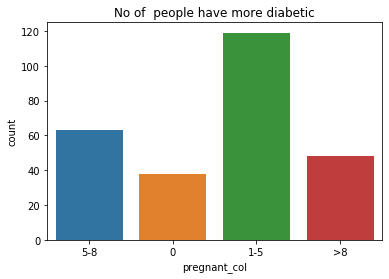

In [423]:

k['pregnant_col']=''
for i in k.pregnant.index:
    if(k.pregnant[i]==0):
        
        k['pregnant_col'][i]='0'
    elif (df.pregnant[i]<=5 and df.pregnant[i]>=1):
        k['pregnant_col'][i]='1-5'
    elif (df.pregnant[i]<=8 and df.pregnant[i]>5):
        k['pregnant_col'][i]='5-8'
    elif (df.pregnant[i]>8):
        k['pregnant_col'][i]='>8'

sns.countplot(k['pregnant_col'])
plt.title('No of  people have more diabetic')

In [180]:
'''Inferences--> from above univariate analysis, we can get to know some information like, 
distrubutions, and median of target with respect to median of target with 0'''

'''higher the glucose, insulin,bmi,age(Ascending) level higher the diabetic '''

'''dpf, bp doesnt effect much target , we can see from box plot thery are nearly similar'''

'''above details of pregnant say there are more people diabetic are atleast once preg, however these are just inference ,
   we need to get clear picture so we will do more analysis'''

'above details of pregnant say there are more people diabetic are atleast once preg, however these are just inference ,\n   we need to get clear picture so we will do more analysis'

pregnant             AxesSubplot(0.125,0.657941;0.227941x0.222059)
glucose           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
bp_median         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
tricep_median        AxesSubplot(0.125,0.391471;0.227941x0.222059)
insulin_median    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
bmi               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dpf                     AxesSubplot(0.125,0.125;0.227941x0.222059)
age                  AxesSubplot(0.398529,0.125;0.227941x0.222059)
target               AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

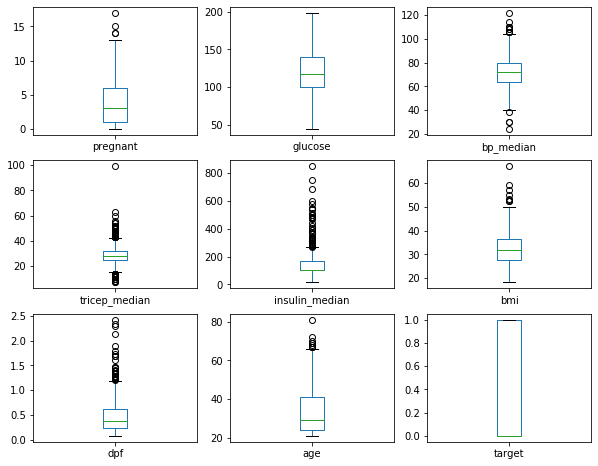

In [324]:
#Data dispertion using percentiles
df.plot(kind= 'box' , subplots=True, layout=(3,3),figsize=(10,8))

In [288]:
'''we can observe the outliers present in insulin more.'''

'we can observe the outliers present in insulin more.'

#####  '''Now  i am finding correlation by normal and also  heatmap visualzation from where we can analyse the relation between each columns '''


In [181]:
df.corr()

,pregnant,glucose,bp_median,tricep_median,insulin_median,bmi,dpf,age,target
pregnant,1.000000,0.128213,0.209151,0.089028,0.058767,0.021546,-0.033523,0.544341,0.221898
glucose,0.128213,1.000000,0.224109,0.227251,0.488870,0.231400,0.137327,0.266909,0.492782
bp_median,0.209151,0.224109,1.000000,0.199349,0.070128,0.285373,-0.001443,0.325135,0.174469
tricep_median,0.089028,0.227251,0.199349,1.000000,0.200129,0.565137,0.106280,0.129537,0.295138
insulin_median,0.058767,0.488870,0.070128,0.200129,1.000000,0.236866,0.146878,0.123629,0.377081
bmi,0.021546,0.231400,0.285373,0.565137,0.236866,1.000000,0.153506,0.025744,0.312249
dpf,-0.033523,0.137327,-0.001443,0.106280,0.146878,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.325135,0.129537,0.123629,0.025744,0.033561,1.000000,0.238356
target,0.221898,0.492782,0.174469,0.295138,0.377081,0.312249,0.173844,0.238356,1.000000


######  '''this uses spearman correlation default , as we can see from above univariate analysis disturbutions are not normally distrubuted we are going with spearman correlation only''

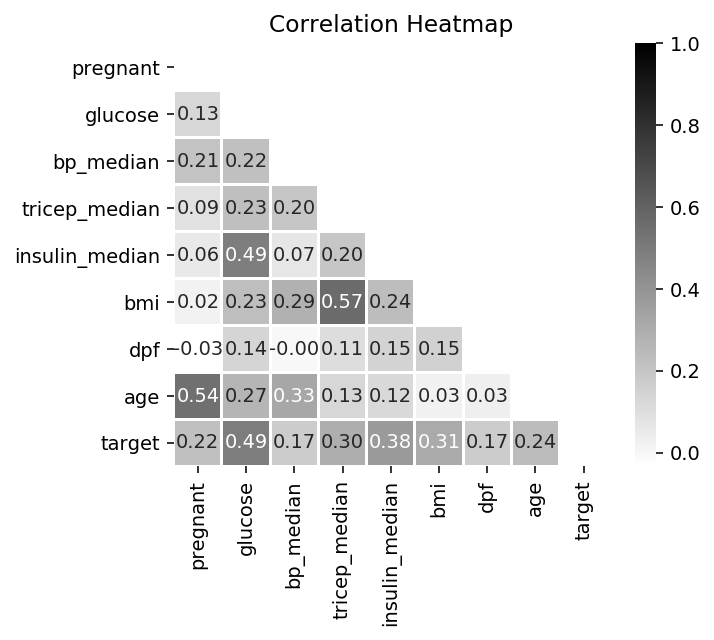

In [182]:
####heatmap
plt.figure(dpi=140,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'gray_r')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

####  ''we can observe that (age, pregnant),(tricep,bmi) are correlated positively'''
####  '''plotting the pair plot to see mutlivariant analysis'''

<Figure size 840x560 with 0 Axes>

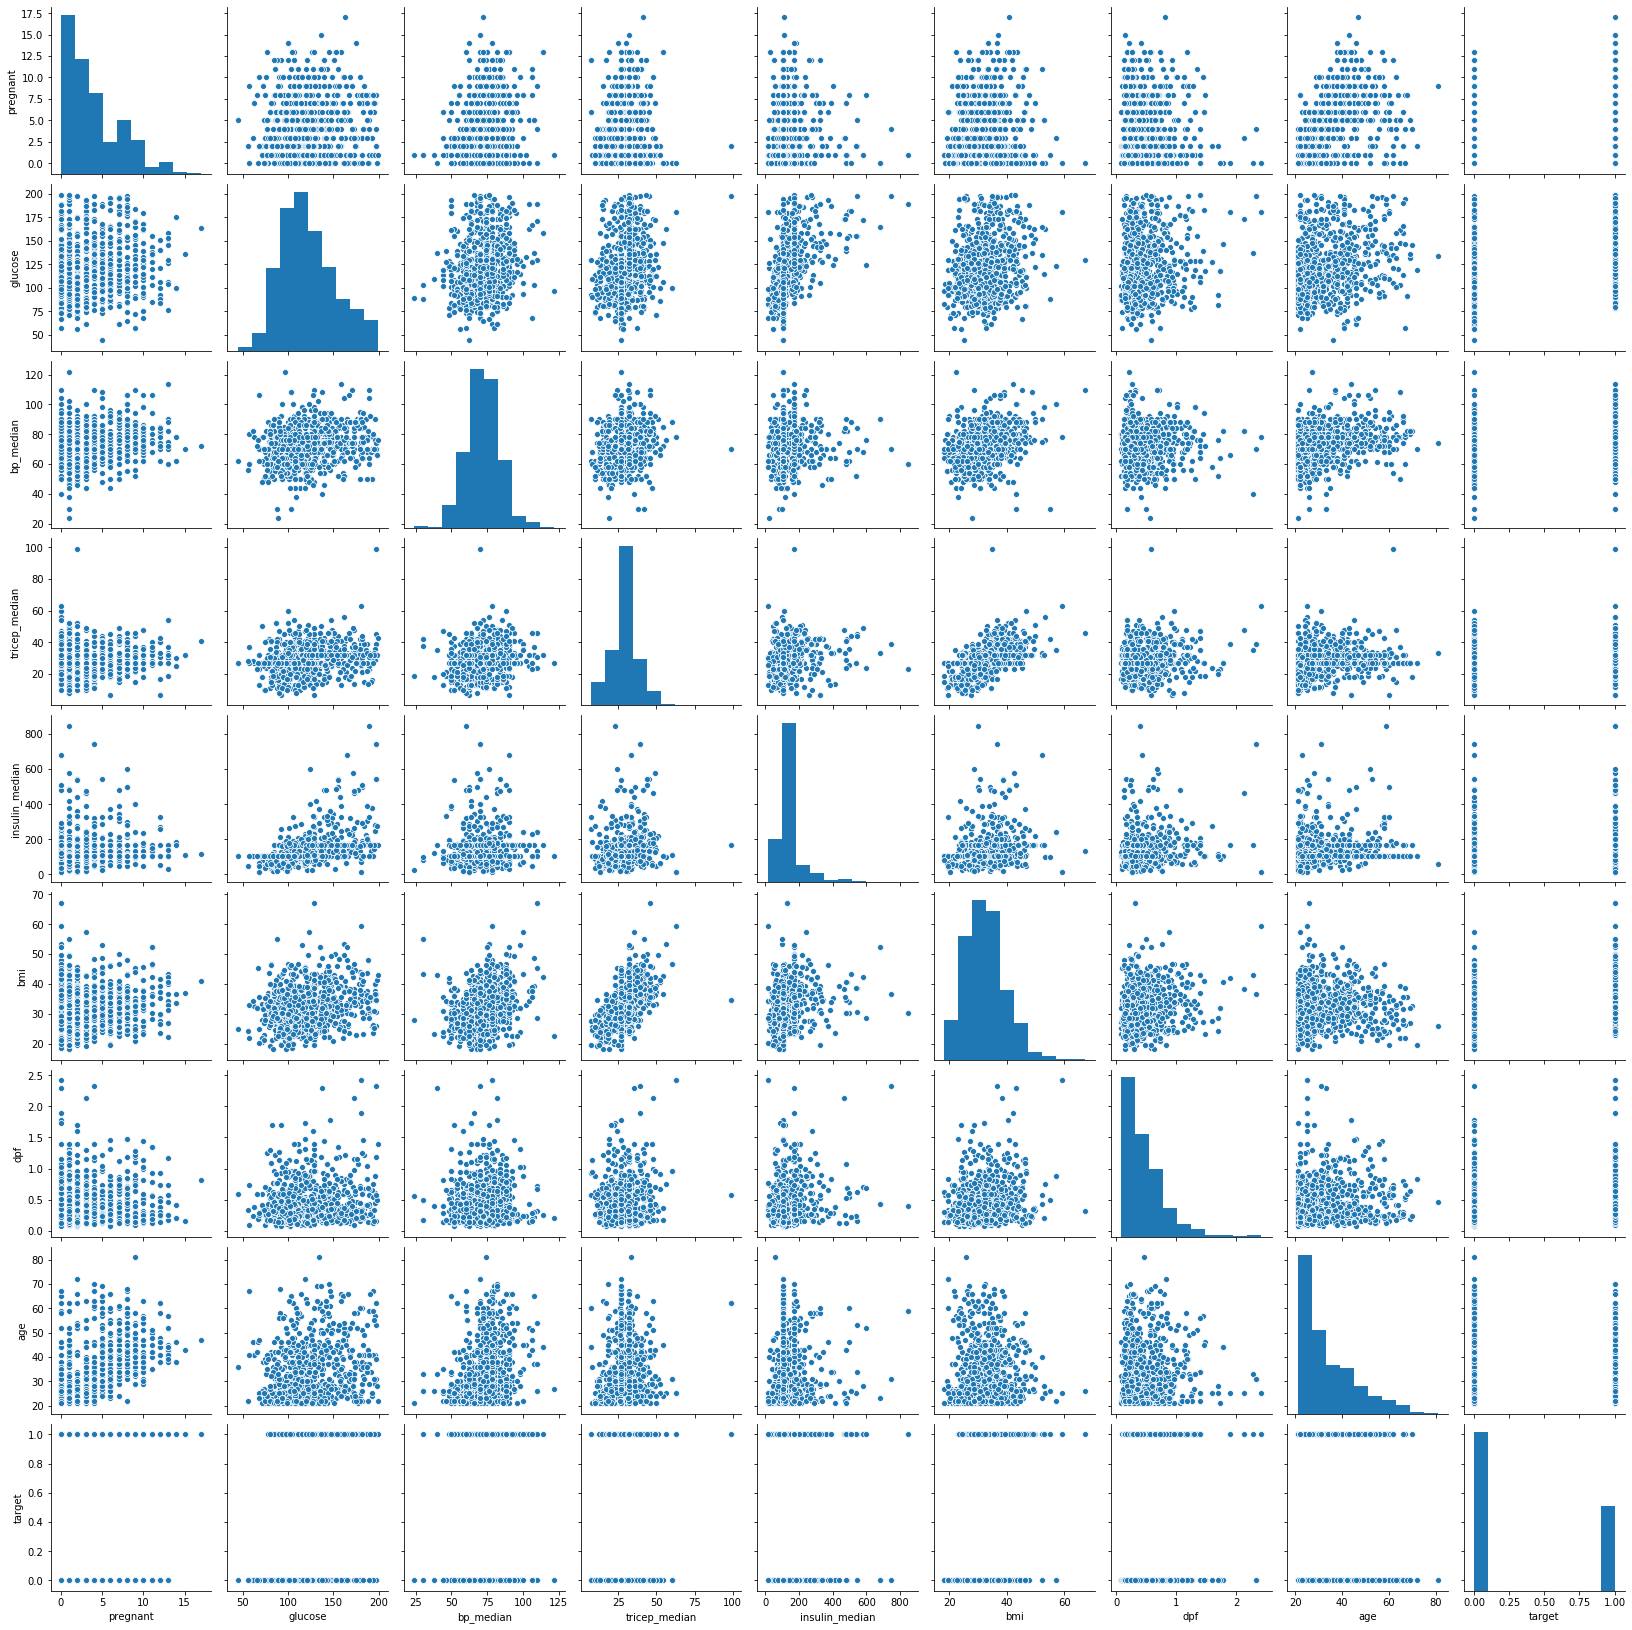

In [284]:
plt.figure(dpi = 140)
sns.pairplot(df)
plt.show()

###### '''from above pair plot we can make some conclusions
###### 1.glucose,bp,tricep,insulin are similar to normal distrubution
###### 2.pregnant,dpr,age are skewed to right 
###### 3.(bmi,tricep),(age,pregnant)(but this is not perfectly related),(inslulin,glucose)-->even though heatmap,says that they are goodly correlated we can observe that from pair plot it is clear that the graph is like no relation between them.
###### 4.since every correlated pair is looking like lightly correaled we would be ignoring the concept of multicollinearity, andconsidering all the feature will be good result'''

###### lets do some more anlysis on pair data, so that we can understand them more.

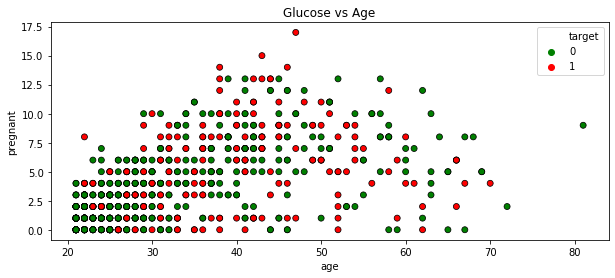

In [184]:
'''now lets understand relation between the ((bmi,tricep),(age,pregnant))'''
palette ={0 : 'green', 1 : 'red'}
edgecolor = 'black'

fig = plt.figure(figsize=(10,4))

ax1 = sns.scatterplot(x = df['age'], y = df['pregnant'], hue = "target",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.title('Glucose vs Age')
plt.show()

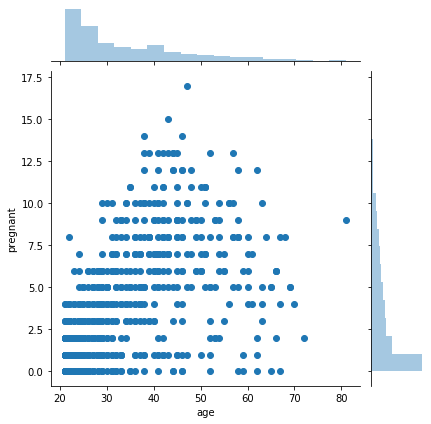

In [185]:
sns.jointplot(df['age'],df['pregnant'])

'''here we are actullay understanding that if age of is high and no of time pregenency no is more then how chance ,they be diebetics or not'''

'''we can clearly see from plot, tht even though age is minimum  and no of pregency is low no risk of diabetic,,
age is medium, and irrespective of pregenancy they are diabetics ,same towards high age,so deciding to ignore any one can lead to loss of data'''


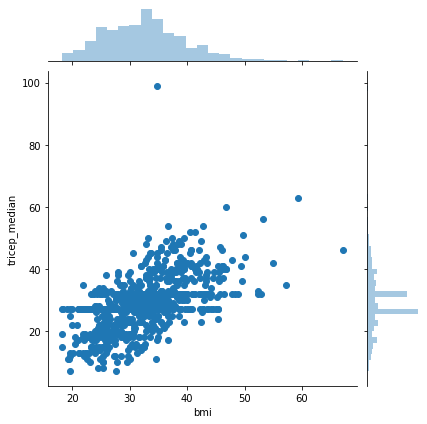

In [186]:
sns.jointplot(df['bmi'],df['tricep_median'])

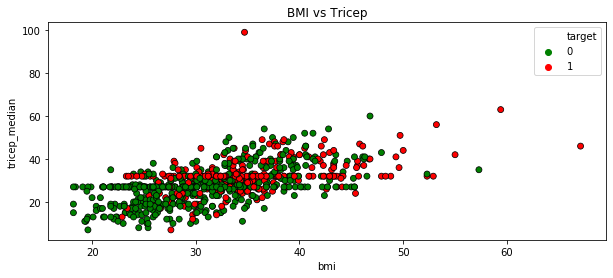

In [187]:
'''now checking with respect to bmi,tricep'''
palette ={0 : 'green', 1 : 'red'}
edgecolor = 'black'

fig = plt.figure(figsize=(10,4))

ax1 = sns.scatterplot(x = df['bmi'], y = df['tricep_median'], hue = "target",data = df, palette = palette, edgecolor=edgecolor)

plt.title('BMI vs Tricep')
plt.show()

'''here we are actullay understand that bmi and tricep are actually correlated and
we can also observe that if bmi and tricep are low then risk of diebetis are low 
and if skin is high and bmi is less and also when skin is high and bmi is high then that cases risk of diabetis is high
that skin is low and bmi is high then the chances is diabetis is low only,so once we can come to conclusion that skin is imp feature for target 
and as skin increases tricep also increases,and correlation is not low but medium'''
'''once consider the skin and target so that we can be sure of the effect of skin values on target'''

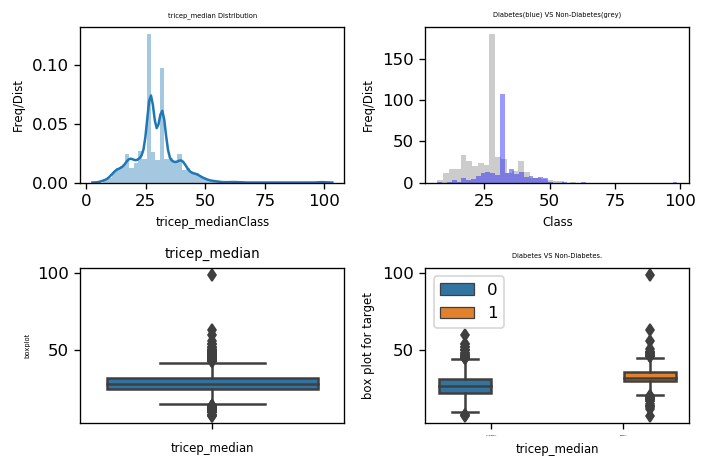

'from univariate analysis it is clear that average value of tricep is slightly high than average value of tricep at target=0'

In [188]:
univariate_analyis('tricep_median')
'''from univariate analysis it is clear that average value of tricep is slightly high than average value of tricep at target=0'''

######  '''now its really important to check insulin,glucose as theoritically we know diabetic is due to high insulin, glucose values'''
###### '''lets check the relation btn them first then do univariate analysis on them with respect to target, however from heatmap we came to know that relation between them is weak positive correlation,and correlation between target and glucose is high, and second after glucose , target is varying with insulin value, so lets understand visually'''

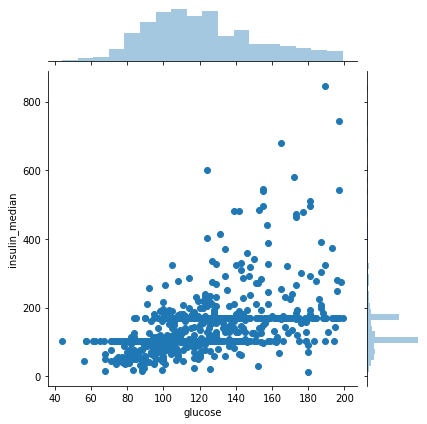

In [189]:
sns.jointplot(df['glucose'],df['insulin_median'])

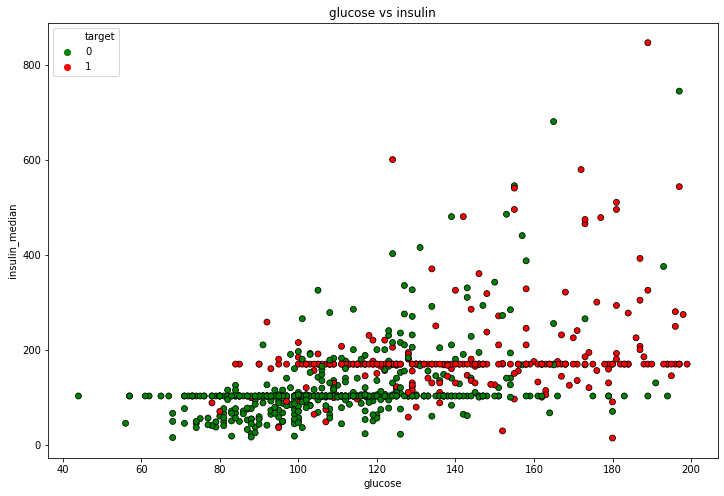

In [190]:
palette ={0 : 'green', 1 : 'red'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = df['glucose'], y = df['insulin_median'], hue = "target",
                    data = df, palette = palette, edgecolor=edgecolor)

plt.title('glucose vs insulin')
plt.show()

#####  '''so, from above univariate analyis of glucose and insulin, and with multivariate analysis we can conclude that glucose ,insulin values of diabetic people is higher that of insulin, glucose values of non diabetic people)'''

#since from above univariate analysis we are assuming that every column is following distrubution, and some columns are skewed, we check them.

In [191]:
df.skew()

pregnant          0.901674
glucose           0.535587
bp_median         0.140830
tricep_median     0.817477
insulin_median    3.028046
bmi               0.601059
dpf               1.919911
age               1.129597
target            0.635017
dtype: float64

## Inferential statisctics

###### Above we made a assumption on data like they are skew , let do normal test, on all dataset to know which follows guassian distrubution.
###### we can apply shapiro test

Shapiro-Wilk Normality Test for  pregnant : W Statistics -  0.9042782783508301 P value -  1.6080885881590613e-21


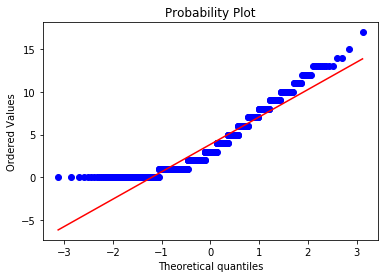

Shapiro-Wilk Normality Test for  glucose : W Statistics -  0.9696223139762878 P value -  1.5240374934277767e-11


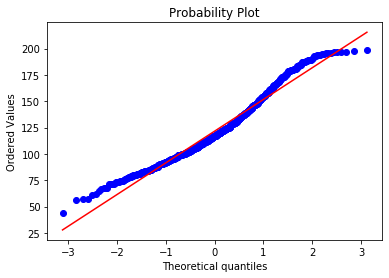

Shapiro-Wilk Normality Test for  bp_median : W Statistics -  0.9882556200027466 P value -  7.92563059803797e-06


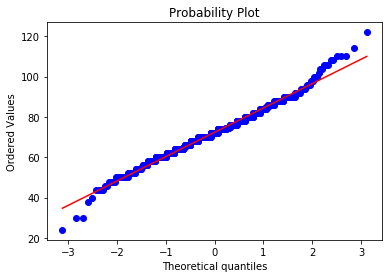

Shapiro-Wilk Normality Test for  tricep_median : W Statistics -  0.9490076303482056 P value -  1.2570854086683698e-15


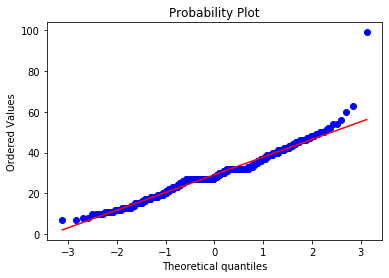

Shapiro-Wilk Normality Test for  insulin_median : W Statistics -  0.7211034297943115 P value -  7.175844294680521e-34


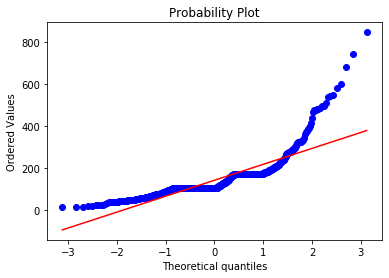

Shapiro-Wilk Normality Test for  bmi : W Statistics -  0.9794020652770996 P value -  6.255587603476442e-09


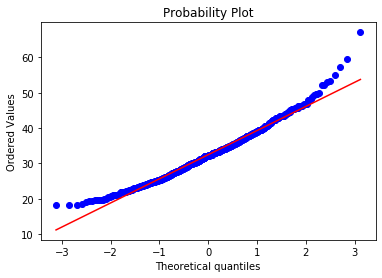

Shapiro-Wilk Normality Test for  dpf : W Statistics -  0.8365186452865601 P value -  2.477696547502535e-27


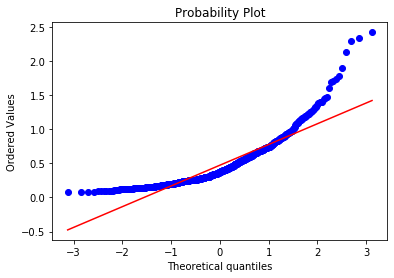

Shapiro-Wilk Normality Test for  age : W Statistics -  0.8747662305831909 P value -  2.401946561183188e-24


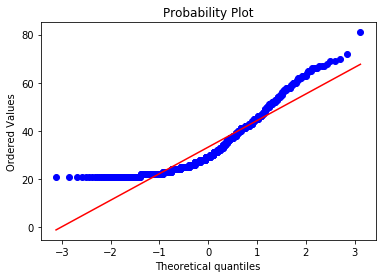

Shapiro-Wilk Normality Test for  target : W Statistics -  0.602509617805481 P value -  1.2922618893873923e-38


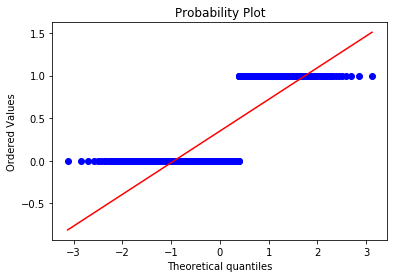

In [192]:
'''Here we will check whether our assumption of curve are corrrect or not'''
'''Null Hypothesis (H0)  and the Alternate Hypothesis is represented by (H1 or Ha).

"Null hypothesis" usually refers to a general statement or default position that there is no relationship between 
two measured phenomena. Rejecting the null hypothesis concludes that there is no validity to believe that there is a
relationship between the two phenomena.'''
'''here we would be checking distrubution with respect to graphical test and numerical test(however we have already seen graphicaltest like histogram here i will be checking with qqplot)'''
def is_normal(col,df):  
    #numerical test
    #for numerical i am using shipro test
    from scipy.stats import shapiro
    statistics, p = shapiro(df[col])
    print("Shapiro-Wilk Normality Test for  "+col+" : W Statistics - ",statistics, "P value - ", p)
    '''here once the p values is greater , then we cannot reject the hypothesis'''
    stats.probplot(df[col], dist="norm",plot=plt,)
    plt.show()
for i in df.columns:
    is_normal(i,df)

###### '''seems like every column is rejected the hypothesis, so our conclusion about distrubution is wrong..maybe one of reason here is lot of outliers in each column'''


###### '''so , we can use transformations like log,exp etc to make it normally distrubution, but since i am trying with tree modelling, we can ignore'''

#### Q1: ALL diabetic patients were asked how much insulin level they have?

In [193]:
###The number of diabetic patients were asked how much insulin level they have?
###so here insulin level here decides the population , so here we are considering the sample as df['target']==1
'''Here we are finding the coincidence interval for diabetic patients insulin interval"'''
z_critical=1.96
mu=df.loc[df.target==1]['insulin_median'].mean()
stdp=df.loc[df.target==1]['insulin_median'].std()
print('The Coincidence interval is from '+str((mu-z_critical*stdp))+"  to  "+str((mu+z_critical*stdp)))

The Coincidence interval is from 3.151408741615512  to  372.07993454196657


######  Q2. what is the value for insulin for diabetic and non diabetic, perform hypothesis test to validate

In [195]:
z,p_value = sm.stats.ztest(df.loc[df.target==1]['insulin_median'],df.loc[df.target==0]['insulin_median'])

print("P-Value is ==> ",p_value)

P-Value is ==>  1.8846480562609336e-29


###### so we can reject the null hypothesis, saying there is difference between diabetic and non diabetic patients 

In [194]:
# here we will be calculating population mean for insulin.
import random

print('Mean of population ',np.mean(df['insulin_median']))
sample_mean_diabetic = []
sample_mean_non_diabetic = []
for i in range(1000):
    sample = np.random.choice(df.loc[df.target==1]['insulin_median'], 50)
    mean = np.mean(sample)
    sample_mean_diabetic.append(mean)
print("Mean of Insulin for Diabetic patients:",np.mean(sample_mean_diabetic))


for i in range(1000):
    sample = np.random.choice(df.loc[df.target==0]['insulin_median'], 50)
    mean = np.mean(sample)
    sample_mean_non_diabetic.append(mean)
print("Mean of Insulin for Non-Diabetic patients:",np.mean(sample_mean_non_diabetic))

Mean of population  141.75390625
Mean of Insulin for Diabetic patients: 187.82799
Mean of Insulin for Non-Diabetic patients: 116.40478


######  '''Observe that insulin value for diabetic patients are high than non diabetic patients'''

###### Question 3: What proportion of people report they have diabetes (according to given sample of data)?

In [294]:
import statsmodels.api as sm
n = df.shape[0]
diabetic = df.loc[df.target==1]["target"].value_counts()
'''we are considering binomial distrubution here as we know that no of people is discrete value we can consider the proportions and find the coincidence interval'''
print("\n95% Confidence interval is\n ",sm.stats.proportion_confint(diabetic, n),'\n')


95% Confidence interval is
  (1    0.315248
dtype: float64, 1    0.382668
dtype: float64) 



##### Q3.1 What is average number of BMI of Patients with diabetes? 
###### Population ==> All Patients with Diabetes

###### Parameter of Interest ==> Population Mean number of BMI with diabetes.

###### Task : Construct a 95% C.I. for population mean of BMI for all Patients with Diabetes.

In [326]:
# #without normalizing the data we get the below values...
# sample=df.loc[df.target==1]['bmi']
# m=sample.mean()
# std=sample.std()
# print('the mean of no of age to be diabetes is from ',m-(1.96*std/np.sqrt(len(sample)))," to ",m+(1.96*std/np.sqrt(len(sample))))
# print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df.loc[df.target==1]['bmi']).zconfint_mean())

the mean of no of age to be diabetes is from  34.59154592646734  to  36.17114064069674

95% C.I. with statsmodels library ==> (34.591560439179155, 36.17112612798501)


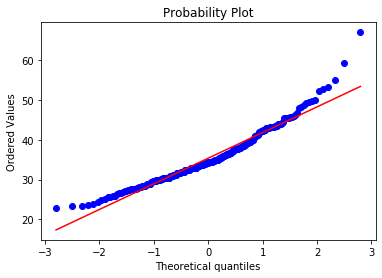

In [297]:
stats.probplot(df[df['target']==1]['bmi'], dist="norm",plot=plt) #QQ plot for normality checking
plt.show()

In [305]:
#since the above is not normalised , we better do normalisation with transformations and check the CI
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_BMI = np.array(df[df['target']==1]['bmi']).reshape(-1,1)
# norm_BMI = pd.DataFrame(scaler.fit_transform(df_BMI))
# stats.probplot(norm_BMI[0], dist="norm",plot=plt) #QQ plot for normality checking
# plt.show()



In [306]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_BMI = np.array(df[df['target']==1]['bmi']).reshape(-1,1)
# norm_BMI = pd.DataFrame(scaler.fit_transform(df_BMI))
# stats.probplot(norm_BMI[0], dist="norm",plot=plt) #QQ plot for normality checking
# plt.show()

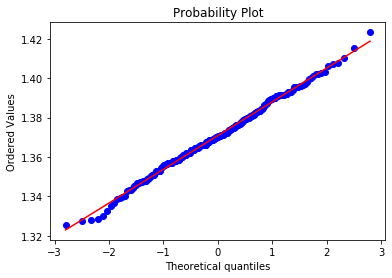

In [320]:
#Using boxcox to normalise the data
result, lmbda = stats.boxcox(df[df['target']==1]['bmi'])
stats.probplot(result, dist="norm",plot=plt) #QQ plot for normality checking
plt.show()
def invert_boxcox(value, lam):
    # log case
    if lam == 0:
        return exp(value)
    # all other cases
    return np.exp(np.log(lam * value + 1) / lam)

In [321]:
lb = invert_boxcox(sm.stats.DescrStatsW(result).zconfint_mean()[0],lmbda)
ub = invert_boxcox(sm.stats.DescrStatsW(result).zconfint_mean()[1],lmbda)
print("\n95% C.I. with statsmodels library ==>",lb,'to',ub)


95% C.I. with statsmodels library ==> 33.744539887146004 to 35.19129970486333


### Question 3.2 What is average number of Bmi of Patients without diabetes?
###### Population ==> All Patients without Diabetes

###### Parameter of Interest ==> Population Mean number of Bmi without diabetes.

###### Task : Construct a 95% C.I. for population mean  of Bmi for all Patients without Diabetes.

In [198]:

# '''we can perform test for this, because with the same data we are almost commenting on population'''
# print("\n95% C.I. with statsmodels library ==>",sm.stats.DescrStatsW(df.loc[df.target==0]['age']).zconfint_mean())


95% C.I. with statsmodels library ==> (30.167303757946893, 32.212696242053106)


With 95% confidence, the population mean Ages(number of) for all Patients with Diabetes is estimated to be between 30 to 33 times.


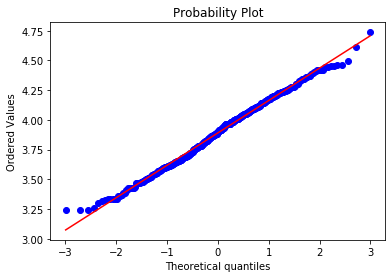

In [327]:
#But data above is not normalised, lets check with normalised data
result, lmbda = stats.boxcox(df[df['target']==0]['bmi'])
stats.probplot(result, dist="norm",plot=plt) #QQ plot for normality checking
plt.show()

In [328]:
#When using non normalised data C.I is (30.167303757946893, 32.212696242053106)
lb = invert_boxcox(sm.stats.DescrStatsW(result).zconfint_mean()[0],lmbda)
ub = invert_boxcox(sm.stats.DescrStatsW(result).zconfint_mean()[1],lmbda)
print("\n95% C.I. with statsmodels library ==>",lb,'to',ub)


95% C.I. with statsmodels library ==> 29.70631861384096 to 30.821867132965203


With 95% confidence, the population mean of BMI for all non diabetic Patients is estimated to be between 29.706 to 30.82

#### Q 3.3 : Considering Diabetic-Non Diabetic patients, do diabetic patients have higher mean Bmi month than Non Diabetic Patients?

###### Population ==> Diabetic and Non-Diabetic Patients

###### Parameter of Interest ==> (μ1 − μ2 ): bmi

###### Task: Perform an independent samples test regarding the value for the difference in mean Pregnancies between Diabetic and Non Diabetic Patients.

###### μ1 ==> Mean BMI of Diabetic Patients.

###### μ1 ==> Mean BMI of Non-Diabetic Patients.

###### Null: There is no difference in mean BMI

###### Alternative: There is a significant difference in mean BMI 

###### Significance Level = 5%

In [330]:
z,p_value = sm.stats.ztest(df.loc[df.target==1]['bmi'],df.loc[df.target==0]['bmi'])

print("P-Value is ==> ",p_value)

P-Value is ==>  9.297696174436666e-20


Value is less than 0.05 so we can reject the null hypothesis, saying both mean are same, so we can conclude they differ and there is significant difference between them

'''similarly we can perform hypothesis by test methods for all other columns, if needed'''

# Feature Engineering

In [200]:
# def check_outliers(col):
#     plt.subplot(1,2,1)
#     sns.boxplot(col)
#     plt.subplot(1,2,2)
#     sns.distplot(col)
# def non_normal_outliers(col):
#     IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
#     lower_bridge=df[col].quantile(0.25)-(IQR*1.5)
#     upper_bridge=df[col].quantile(0.75)+(IQR*1.5)
#     #print(lower_bridge), print(upper_bridge)
#     df.loc[df[col]>upper_bridge,col]=upper_bridge
#     if lower_bridge>0:
#         df.loc[df[col]<lower_bridge,col]=lower_bridge
#     #check_outliers(df[col])
# def normal_outliers(col):
#     upper_boundary=df[col].mean() + 3* df[col].std()
#     lower_boundary=df[col].mean() - 3* df[col].std()
#     #print(lower_boundary), print(upper_boundary),print(df[col].mean())
#     df.loc[df[col]>upper_boundary,col]=upper_boundary
#     if lower_boundary>0:
#         df.loc[df[col]<lower_boundary,col]=lower_boundary
#     #check_outliers(df[col])

## Feature Selecting 

### Checking outliers and removing if needed.
##### We need to understand one thing here, as there are outliers, and our data is small, and less bp, high bp, high insulin, high glucose,(these two are Common ) , so the outliers also contains information , so its not at all good to remove the outlier part,

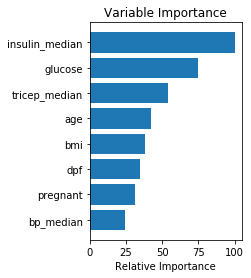

In [201]:
feature_cols = df.columns.drop('target')
target = df.target
#model = RandomForestRegressor(n_estimators=100, random_state=0)
#my_pipeline.fit(X_train, y_train)
from sklearn.ensemble import ExtraTreesClassifier
array = df.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
#print(model.feature_importances_,feature_cols)
feature_importance =model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [202]:
df.var()

pregnant            11.354056
glucose            926.489244
bp_median          146.556183
tricep_median       79.046676
insulin_median    7938.960871
bmi                 47.270664
dpf                  0.109779
age                138.303046
target               0.227483
dtype: float64

'''from above we can see that variance of dpf is very low, and we can ignore dpf, but while considering not
loosing the data, as (dpf,target) are weak positive correlated, still it can help us to get good outcome, so eliminating is
not a good choice here as data set also small, and have less number of features,so i am considering all the features'''



###### we can use, select from model as we go with logistic regression model also, and also extratreeclassifier, for selecting the best features, but here we are not selecting features ,because there is very less data provided.

#### Transformation

In [203]:
#Tranformations

scaler=StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(df)


# Model Selection


#### splitting data set

#### we can use train_test_split, but as data set small, it is always good to cross _Validation to make sure ur data is unbiased and we will be not missing the data  in training data set by making it test data.


In [204]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X.isnull().sum()

pregnant          0
glucose           0
bp_median         0
tricep_median     0
insulin_median    0
bmi               0
dpf               0
age               0
dtype: int64

In [331]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [433]:
acc=pd.DataFrame(index=['Normal','minmax','standard'])
def cross_validation(name,model):
    
    print(acc)
    scalers={'minmax':MinMaxScaler(),'standard':StandardScaler()}
    acc[name]='10'
    for i in acc.index:
        if i=='Normal':
            acc.loc[i,name]=''
            scores = cross_validate(model, X_train, Y_train, scoring='accuracy',cv = KFold(n_splits=5))
            acc.loc[i,name]="%0.4f (+/- %0.4f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2)
        else:
            clf = make_pipeline(scalers[i], model)
            scores = cross_validate(clf, X_train, Y_train, scoring='accuracy',cv = KFold(n_splits=5))
            acc.loc[i,name]="%0.4f (+/- %0.4f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2)
#     print("Accuracy for ",name ,"\n: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
    acc

In [434]:
#listing the model to be done,
all_models={
#logistic regression
'lr':LogisticRegression(),

#random forest classifier
'rf' : RandomForestClassifier(random_state=10),

#GRADIENT BOOSTING CLASSIFIER
'gbc': GradientBoostingClassifier(),

#Knn 
'knn': KNeighborsClassifier(),

#DESICION TREE
'dtc' : DecisionTreeClassifier(),

# #XGBOOST 
# import xgboost as xgb
# xgbcl = xgb.XGBClassifier()

#SVc
'svc': SVC(gamma='auto'),


#naive bayes

'gnb':GaussianNB()
    }


for i,j in all_models.items():
    cross_validation(i,j)

Empty DataFrame
Columns: []
Index: [Normal, minmax, standard]
                           lr
Normal    0.7764 (+/- 0.0708)
minmax    0.7876 (+/- 0.0689)
standard  0.7858 (+/- 0.0715)
                           lr                   rf
Normal    0.7764 (+/- 0.0708)  0.8863 (+/- 0.0368)
minmax    0.7876 (+/- 0.0689)  0.8826 (+/- 0.0371)
standard  0.7858 (+/- 0.0715)  0.8845 (+/- 0.0373)
                           lr                   rf                  gbc
Normal    0.7764 (+/- 0.0708)  0.8863 (+/- 0.0368)  0.8883 (+/- 0.0420)
minmax    0.7876 (+/- 0.0689)  0.8826 (+/- 0.0371)  0.8865 (+/- 0.0484)
standard  0.7858 (+/- 0.0715)  0.8845 (+/- 0.0373)  0.8864 (+/- 0.0485)
                           lr                   rf                  gbc  \
Normal    0.7764 (+/- 0.0708)  0.8863 (+/- 0.0368)  0.8883 (+/- 0.0420)   
minmax    0.7876 (+/- 0.0689)  0.8826 (+/- 0.0371)  0.8865 (+/- 0.0484)   
standard  0.7858 (+/- 0.0715)  0.8845 (+/- 0.0373)  0.8864 (+/- 0.0485)   

                         

In [435]:
acc.columns=['lOGISTIC REGRESSION', 'RANDOM FORREST', 'GRADIENTBOOSTCLASSIFIER', 'K NEAREST', 'DESCICION TRESS','SVC', 'GUASSIAN NB']
acc.T

,Normal,minmax,standard
lOGISTIC REGRESSION,0.7764 (+/- 0.0708),0.7876 (+/- 0.0689),0.7858 (+/- 0.0715)
RANDOM FORREST,0.8863 (+/- 0.0368),0.8826 (+/- 0.0371),0.8845 (+/- 0.0373)
GRADIENTBOOSTCLASSIFIER,0.8883 (+/- 0.0420),0.8865 (+/- 0.0484),0.8864 (+/- 0.0485)
K NEAREST,0.8771 (+/- 0.0517),0.7821 (+/- 0.0253),0.8008 (+/- 0.0434)
DESCICION TRESS,0.8398 (+/- 0.0433),0.8380 (+/- 0.0190),0.8529 (+/- 0.0451)
SVC,0.6628 (+/- 0.0489),0.7914 (+/- 0.0720),0.8156 (+/- 0.0728)
GUASSIAN NB,0.7690 (+/- 0.0709),0.7690 (+/- 0.0709),0.7690 (+/- 0.0709)


'''from above we can consider any one of rf,gbc,knn'''
'''we can understand that, since data is effected by outliers there is low accuracy in logistic regression'''


## Hyper parameter tuning

#### The main parameters used by a Random Forest Classifier are:

###### criterion = the function used to evaluate the quality of a split.
###### max_depth = maximum number of levels allowed in each tree.
###### max_features = maximum number of features considered when splitting a node.
###### min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
###### min_samples_split = minimum number of samples necessary in a node to cause node splitting.
###### n_estimators = number of trees in the ensamble.

In [208]:


def create_model(clf,method='grid'):
    if( method=='random'):
        # Number of trees in random forest
        n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
        # Number of features to consider at every split
        max_features = ['auto', 'sqrt','log2']
        # Maximum number of levels in tree
        max_depth = [int(x) for x in np.linspace(10, 1000,10)]
        # Minimum number of samples required to split a node
        min_samples_split = [2, 5, 10,14]
        # Minimum number of samples required at each leaf node
        min_samples_leaf = [1, 2, 4,6,8]
        # Create the random grid
        random_grid = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                      'criterion':['entropy','gini']}
        print(random_grid)

        model_randomcv=RandomizedSearchCV(estimator=clf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                                       random_state=100,n_jobs=-1,scoring='accuracy')
        
        ### fit the randomized model
        model_randomcv.fit(X_train,Y_train)


        return model_randomcv
    elif(method=='grid'):
        parameters= {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}
        model_gridcv = GridSearchCV(clf, param_grid=parameters,cv = 10,n_jobs = -1,verbose = 2,scoring='accuracy')
        model_gridcv.fit(X_train,Y_train)
        return model_gridcv

In [209]:
rf_model_random=create_model(rf,'random')

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.1min finished


In [210]:
 #checking best parameters
print(rf_model_random.best_params_)
#taking the best estimators
best_random_grid=rf_model_random.best_estimator_

#prediction part
y_pred=best_random_grid.predict(X_test)
#printing confusion matrix
print(confusion_matrix(Y_test,y_pred))
conf_matrix_random=confusion_matrix(Y_test,y_pred)

#printing accuracy score
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))

#classification report 
print("Classification report:\n {}".format(classification_report(Y_test,y_pred)))

{'n_estimators': 2000, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 340, 'criterion': 'gini'}
[[130  14]
 [ 16  71]]
Accuracy Score 0.8701298701298701
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       144
           1       0.84      0.82      0.83        87

    accuracy                           0.87       231
   macro avg       0.86      0.86      0.86       231
weighted avg       0.87      0.87      0.87       231



In [211]:
rf_model_grid=create_model(rf,'grid')

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 10.3min finished


In [212]:
#checking best parameters
print(rf_model_grid.best_params_)
#taking the best estimators
best_random_grid=rf_model_grid.best_estimator_

#prediction part
y_pred=best_random_grid.predict(X_test)
#printing confusion matrix
print(confusion_matrix(Y_test,y_pred))
conf_matrix_grid=confusion_matrix(Y_test,y_pred)

#printing accuracy score
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))

#classification report 
print("Classification report:\n {}".format(classification_report(Y_test,y_pred)))

{'max_depth': None, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 500}
[[127  17]
 [ 16  71]]
Accuracy Score 0.8571428571428571
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       144
           1       0.81      0.82      0.81        87

    accuracy                           0.86       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.86      0.86      0.86       231



In [213]:
'''You can also check the accuracy by confusion matrix by'''
#print('accuracy  is ',((confusion_matrix[0][0]+confusion_matrix[1][1])/((confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[0][1]+confusion_matrix[1][0]))))


'You can also check the accuracy by confusion matrix by'

###### Visualizing confusion_matrix

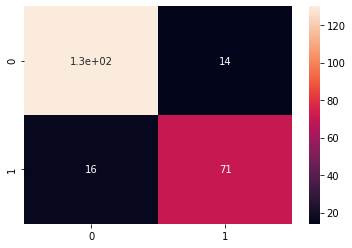

In [214]:
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
sns.heatmap(conf_matrix_random,annot=True)

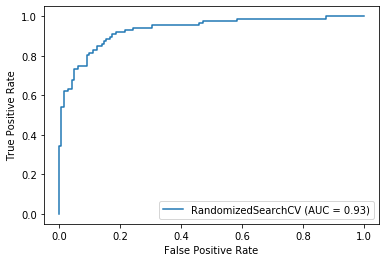

In [220]:
plot_roc_curve(rf_model_random,X_test,Y_test)

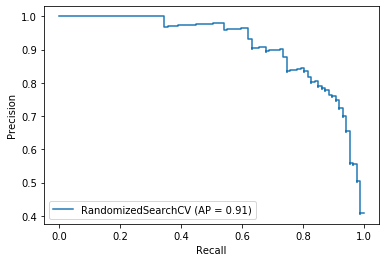

In [219]:
plot_precision_recall_curve(rf_model_random,X_test,Y_test)

### Loading into Pickle

In [217]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)

In [113]:
for_Report=df.copy()
for_Report.columns=['pregnant', 'glucose', 'bp', 'tricep', 'insulin',
       'bmi', 'dpf', 'age', 'target']


In [140]:
for_Report.to_csv('FOR_REPORT.csv')

In [75]:
df.groupby(df.target).median()

,pregnant,glucose,bp_median,tricep_median,insulin_median,bmi,dpf,age
target,,,,,,,,
0,2,107.5,70.0,27.0,102.5,30.40,0.336,27
1,4,140.0,74.5,32.0,169.5,34.25,0.449,36


In [117]:
for_Report[df.target==0].to_csv('FOR_REPORT_No.csv')

In [118]:
for_Report[df.target==1].to_csv('FOR_REPORT_Target.csv')

In [120]:
df.insulin_median.max()

846.0

In [121]:
df.insulin_median.min()

14.0

In [134]:
df['age_col']=''
for i in df.age.index:
    if(df.age[i]<20):
        
        df['age_col'][i]='<20'
    elif (df.age[i]<=40 and df.age[i]>=20):
        df['age_col'][i]='20-40'
    else:
        df['age_col'][i]='>40'

In [135]:
df

,pregnant,glucose,bp_median,tricep_median,insulin_median,bmi,dpf,age,target,age_col
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,>40
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,20-40
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,20-40
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,20-40
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,20-40
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,>40
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,20-40
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,20-40
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,>40


In [136]:
df.to_csv('New.csv')

In [137]:
for_Report

,pregnant,glucose,bp,tricep,insulin,bmi,dpf,age,target
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [138]:
for_Report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    float64
 2   bp        768 non-null    float64
 3   tricep    768 non-null    float64
 4   insulin   768 non-null    float64
 5   bmi       768 non-null    float64
 6   dpf       768 non-null    float64
 7   age       768 non-null    int64  
 8   target    768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   glucose         768 non-null    float64
 2   bp_median       768 non-null    float64
 3   tricep_median   768 non-null    float64
 4   insulin_median  768 non-null    float64
 5   bmi             768 non-null    float64
 6   dpf             768 non-null    float64
 7   age             768 non-null    int64  
 8   target          768 non-null    int64  
 9   age_col         768 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [335]:
d={}
d[1]=2
d[2]=5
d

{1: 2, 2: 5}

In [342]:
for (i,j) in d.items():
    print(i,j)

1 2
2 5


In [349]:
krishna={'k':LogisticRegression(),'s':RandomForestClassifier()}

In [350]:
krishna['s']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [374]:
krishna=pd.DataFrame(index=[5,6,7])

In [375]:
krishna['a']=10

In [376]:
krishna

,a
5,10
6,10
7,10


In [378]:
krishna.loc[7,'a']=5

In [379]:
krishna

,a
5,10
6,10
7,5


In [416]:
import sweetviz as sv

 

my_report = sv.analyze(data)
my_report.show_html() 

ModuleNotFoundError: No module named 'sweetviz'

In [417]:
df.glucose.max()

199.0

In [418]:
df.bp_median.max()

122.0